Import packages.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the given excel files.

In [45]:
df = pd.read_csv("ADA_acs_file.csv")

These are thresholds that we used to decide if someone has good access to the child care via walking or using transit

In [46]:
public_ef_threshold = 0.5
walk_ef_threshold = 0.5

Fiter the data based on the threshold, and filter the rows where CMAUID is 535 (representing the GTA).

In [47]:
df['low_access'] = (
    (df['public_ef'] <= public_ef_threshold) & 
    (df['walk_ef'] <= walk_ef_threshold)
)

df_gta_low_access = df[(df['CMAUID'] == 535)]

Graph data.

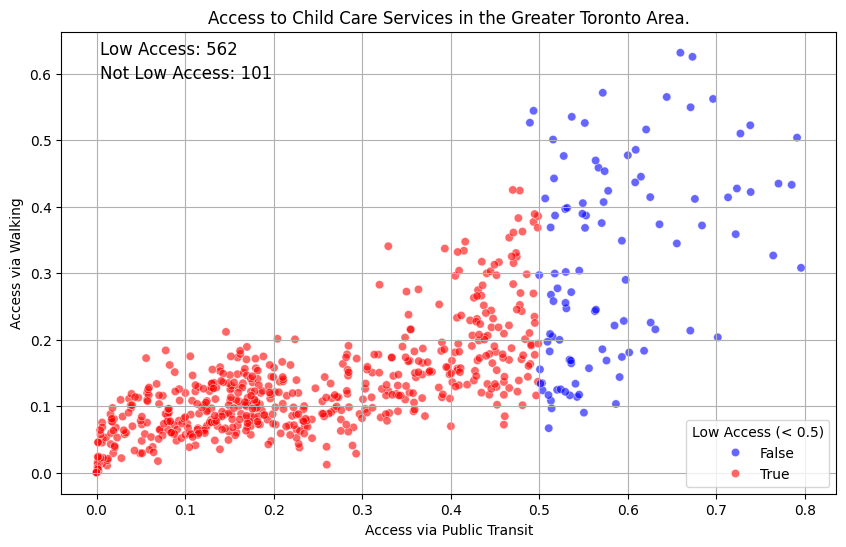


Low Access Counts for CMAUID = 535:
low_access
True     562
False    101
Name: count, dtype: int64


In [48]:
# Here we're visualizing the data based on a true and false system. 
# Specifically, if true then it means that a row's values are below or equal to both thresholds and thus, low access to child care services.
# If false, meaning better access to at least one of the services.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_gta_low_access,
    x='public_ef',
    y='walk_ef',
    hue='low_access',
    palette={True: 'red', False: 'blue'},
    alpha=0.6
)

# This is used to count categories
low_access_counts_535 = df_gta_low_access['low_access'].value_counts()

# This is used to present the amount of data points have/have not any access.
for i, (label, count) in enumerate(low_access_counts_535.items()):
    label_text = "Low Access" if label else "Not Low Access"
    plt.text(
        0.05,
        0.95 - i * 0.05,
        f"{label_text}: {count}",
        transform=plt.gca().transAxes,
        fontsize=12,
        color='black'
    )

# Here we're setting the chart's characteristics.
plt.title("Access to Child Care Services in the Greater Toronto Area.")
plt.xlabel("Access via Public Transit")
plt.ylabel("Access via Walking")
plt.legend(title="Low Access (< 0.5)")
plt.grid(True)
plt.show()

# Count number of low and non-low access neighborhoods for CMAUID 535
low_access_counts_535 = df_gta_low_access['low_access'].value_counts()
print("\nLow Access Counts for CMAUID = 535:")
print(low_access_counts_535)